In [1]:
%load_ext autoreload
%autoreload 2
from utils import *

In [2]:
df_raw = load_dataframe()

In [3]:
df_raw.head()

,text,label
0,US trade gap ballooned in October\n\nThe US tr...,business
1,Japanese mogul arrested for fraud\n\nOne of Ja...,business
2,Jarvis sells Tube stake to Spain\n\nShares in ...,business
3,Small firms 'hit by rising costs'\n\nRising fu...,business
4,Oil prices fall back from highs\n\nOil prices ...,business


In [4]:
PREPROCESSING_PIPELINE = [
                        lower,
                        # remove_emails,
                        replace_special_characters,
                        replace_br,
                        filter_out_uncommon_symbols,
                        remove_stopwords,
                        strip_text
                    ]

In [5]:
print('Pre-processing text...')
 
print()
print(f'[Debug] Before:\n{df_raw.text.values[0]}')
print()
 
# Replace each sentence with its pre-processed version
df = df_raw.copy()
df['text'] = df_raw['text'].apply(lambda txt: text_prepare(txt, PREPROCESSING_PIPELINE))
 
print(f'[Debug] After:\n{df.text.values[0]}')
print()
 
print("Pre-processing completed!")

Pre-processing text...

[Debug] Before:
US trade gap ballooned in October

The US trade deficit widened by more than expected in October, hitting record levels after higher oil prices raised import costs, figures have shown

The trade shortfall was $55.5bn (£29bn), up 9% from September, the Commerce Department said. That pushed the 10 month deficit to $500.5bn. Imports rose by 3.4%, while exports increased by only 0.6%. A weaker dollar also increased the cost of imports, though this should help drive export demand in coming months. "Things are getting worse, but that's to be expected," said David Wyss of Standard & Poor's in New York. "The first thing is that when the dollar goes down, it increases the price of imports. "We are seeing improved export orders. Things seem to be going in the right direction."

Despite this optimism, significant concerns remain as to how the US will fund its trade and budget deficits should they continue to widen. Another problem highlighted by analysts wa

In [6]:
path = 'vocab/'
if not os.path.exists(path):
    os.makedirs(path)

# Check if vocabulary has already been built
if os.path.exists(path + 'idx_to_word.json') and os.path.exists(path + 'word_to_idx.json') and os.path.exists(path + 'word_listing.json'):
    print('Loading existing vocabulary...')
    idx_to_word, word_to_idx, word_listing = load_vocab()
    print('Vocabulary loaded!')
else:
    print('Building vocabulary...')
    idx_to_word, word_to_idx, word_listing = build_vocabulary(df)
    print('Saving vocabulary...')
    save_vocab(idx_to_word, word_to_idx, word_listing)
    print('Vocabulary built!')

Building vocabulary...


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 9002.84it/s]

Saving vocabulary...
Vocabulary built!


In [7]:
evaluate_vocabulary(idx_to_word, word_to_idx, word_listing, df)

[Vocabulary Evaluation] Size checking...
[Vocabulary Evaluation] Content checking...


100%|██████████| 32515/32515 [00:00<00:00, 1059796.51it/s]


[Vocabulary Evaluation] Consistency checking...


100%|██████████| 1000/1000 [00:00<00:00, 19317.37it/s]


[Vocabulary Evaluation] Toy example checking...


100%|██████████| 2/2 [00:00<00:00, 37117.73it/s]


In [8]:
df_train, df_test = split_dataframe(df)

In [9]:
print(f'Train size: {len(df_train)}')
df_train.head()

Train size: 800


,text,label
0,korean war forgotten war korean war 19501953 f...,historical
1,apple rejects flawed claims contact tracing te...,technologie
2,musical treatment capra film classic film wond...,entertainment
3,russian film wins bbc world prize russian dram...,entertainment
4,learn experts 3 simple tricks design standout ...,graphics


In [10]:
print(f'Test size: {len(df_test)}')
df_test.head()

Test size: 200


,text,label
0,ms cuts prices average 24 marks spencer cut pr...,business
1,ask jeeves joins web log market ask jeeves bou...,technologie
2,wife swap makers sue us copycat british produc...,entertainment
3,article 1993apr122315445990 cnsvaxuwecedu nyed...,medical
4,interested information stereoscopic imaging su...,graphics


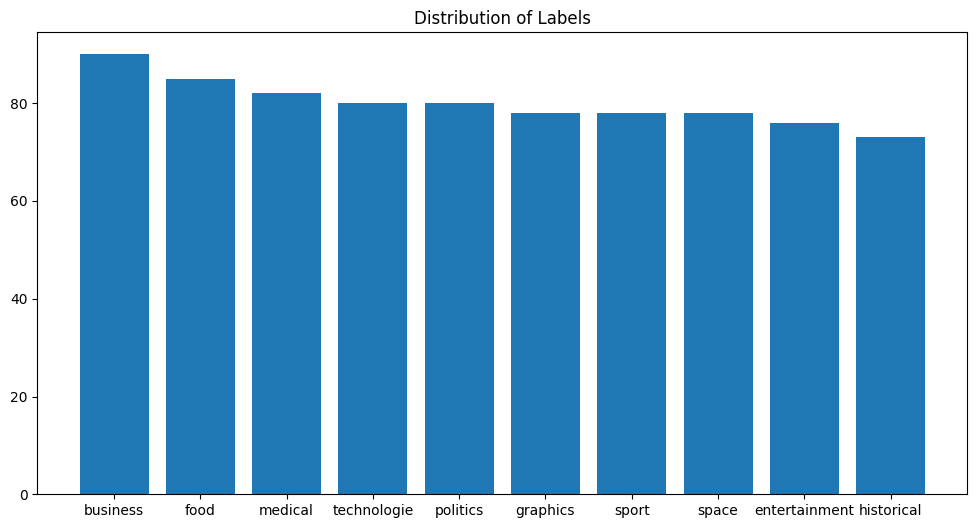

In [11]:
plot_label_distribution(df_train)

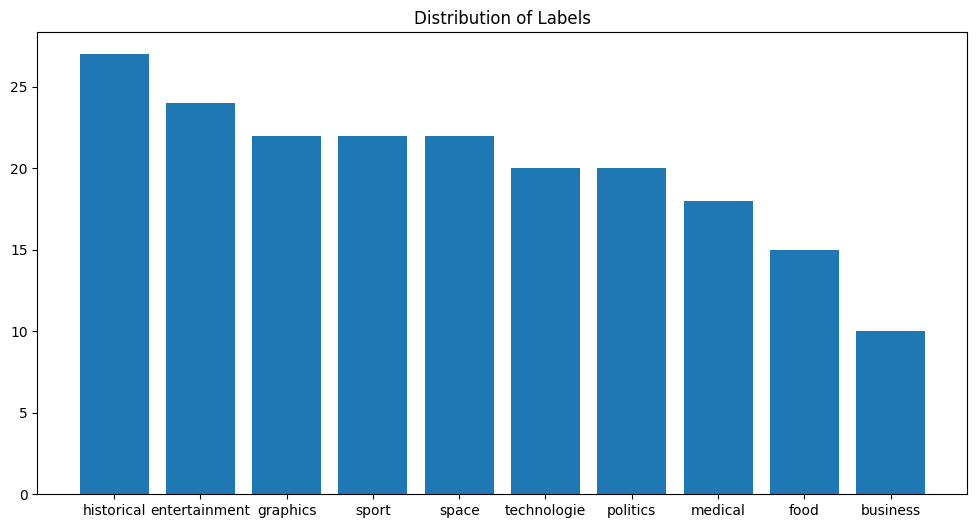

In [12]:
plot_label_distribution(df_test)

## Baseline

In [13]:
# import tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# tf-idf vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(df_train.text.values)

# Transform each text into a vector of word counts
X_train = vectorizer.transform(df_train.text.values)
X_test = vectorizer.transform(df_test.text.values)

# Transform each label into a vector
y_train = df_train.label.values
y_test = df_test.label.values

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (800, 28617)
X_test shape: (200, 28617)
y_train shape: (800,)
y_test shape: (200,)


In [14]:
# train a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# predict the labels on validation dataset
y_pred = classifier.predict(X_test)

# import metrics library
from sklearn import metrics
# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score -> ", metrics.accuracy_score(y_pred, y_test)*100)


Logistic Regression Accuracy Score ->  97.5


In [15]:
# train another classifier
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

# predict the labels on validation dataset
y_pred = classifier.predict(X_test)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ", metrics.accuracy_score(y_pred, y_test)*100)

SVM Accuracy Score ->  96.0


In [16]:
frase_test = [
    "The essence of Sicily wrapped in a single pastry... unmistakable scents and textures bite after bite. Sicilian cannoli are the pride of this beautiful island, together with cassata, irises, almond pastries.... these are among the most popular desserts in the world. Served as a dessert in restaurants to be enjoyed in their original format or the mignon version, Sicilian cannoli are enchanting with their typical bubbled surface and the shimmering ricotta cream in the windows of pastry shops. They attract attention all along the streets of Sicilian towns or during events, sold as sweet street food to be filled at the last moment. Like all regional recipes, there are secrets and versions of Sicilian cannoli that change from city to city or family to family: some people choose to add cocoa and Marsala wine to the dough, just as we did. Others use a shell flavoring of coffee or cinnamon! The ricotta cream, on the other hand, is almost always enriched with chocolate bits and the finished cannoli are often garnished with pistachios, chocolate chips or candied fruit... in short, you will be spoiled with your choices in how to enjoy them! But the basic rule is this: cannoli must be filled at the last minute to enjoy all their crunchiness!",
    "Comparing the performance of the stock with the S&P-500 , on a weekly basis, we note that Seagate Technology maintains positive relative strength in comparison with the index, demonstrating a greater appreciation by investors compared to the index itself (weekly performance + 1.5%, compared to -3.84% for the US basketball index ). The general technical context highlights bearish implications that are strengthening for the leader in the production of hard disk drivers , with negative stresses such as to force levels towards the support area estimated at USD 66.78. Contrary to expectations, however, bullish pressures could push prices up to 68.99 where there is an important resistance level. The dominance of the bears fuels negative expectations for the next session with a potential target set at 65.68. The indications are to be considered mere information tools, and are in no way intended to constitute financial advice, solicitation for public savings or promote any form of investment."
]

frase_test = [text_prepare(txt, PREPROCESSING_PIPELINE) for txt in frase_test]
frase_test = vectorizer.transform(frase_test)
y_pred = classifier.predict(frase_test)


In [17]:
y_pred

array(['food', 'business'], dtype=object)